In [1]:
import numpy as np
import pandas as pd

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [2]:
df_columns = pd.read_csv("spam.csv", encoding="latin-1").columns[:2]
df = pd.read_csv("spam.csv", usecols=df_columns, encoding="latin-1")

In [3]:
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [4]:
df.shape

(5572, 2)

 - Data Cleaning
 - EDA
 - Text Preprocessing
 - Model building
 - Evaluation
 - Improvement
 - Website
 - Deploy

##### 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.sample(4)

,target,text
445,ham,"Sorry, my battery died, I can come by but I'm ..."
2504,ham,"Hello, my boytoy! I made it home and my consta..."
2753,ham,"Derp. Which is worse, a dude who always wants ..."
3307,ham,But i'm surprised she still can guess right lo...


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [8]:
df["target"] = encoder.fit_transform(df["target"])

Check for missing values

In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

Check for duplicate values

In [10]:
df.duplicated().sum()

np.int64(403)

Remove duplicates

In [11]:
df = df.drop_duplicates(keep="first")

In [12]:
df.shape

(5169, 2)

##### 2. EDA

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt

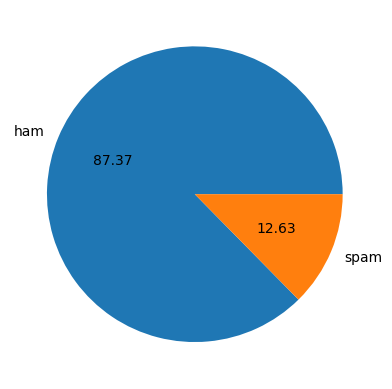

In [16]:
plt.pie(df["target"].value_counts(), labels=encoder.classes_, autopct="%.2f")
plt.show()

Data is imbalanced

In [17]:
import nltk

try:
    nltk.data.find("tokenizers/punkt")
except LookupError:
    nltk.download("punkt")
    nltk.download("punkt_tab")

In [18]:
df.loc[:, "num_characters"] = df["text"].str.len()

In [19]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Tokenize Word

In [20]:
df.loc[:, "num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

Tokenize Sentence

In [21]:
df.loc[:, "num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


Ham

In [24]:
df[df["target"] == 0].drop(["target", "text"], axis=1).describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


Spam

In [25]:
df[df["target"] == 1].drop(["target", "text"], axis=1).describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

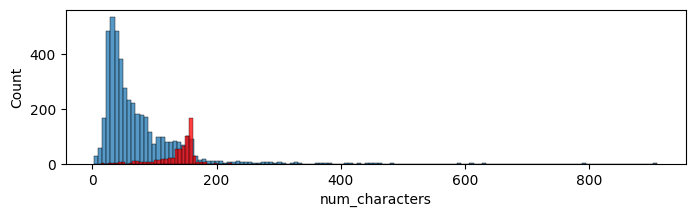

In [27]:
plt.figure(figsize=(8, 2))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

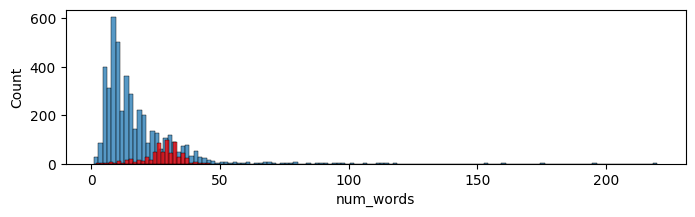

In [28]:
plt.figure(figsize=(8, 2))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color="red")

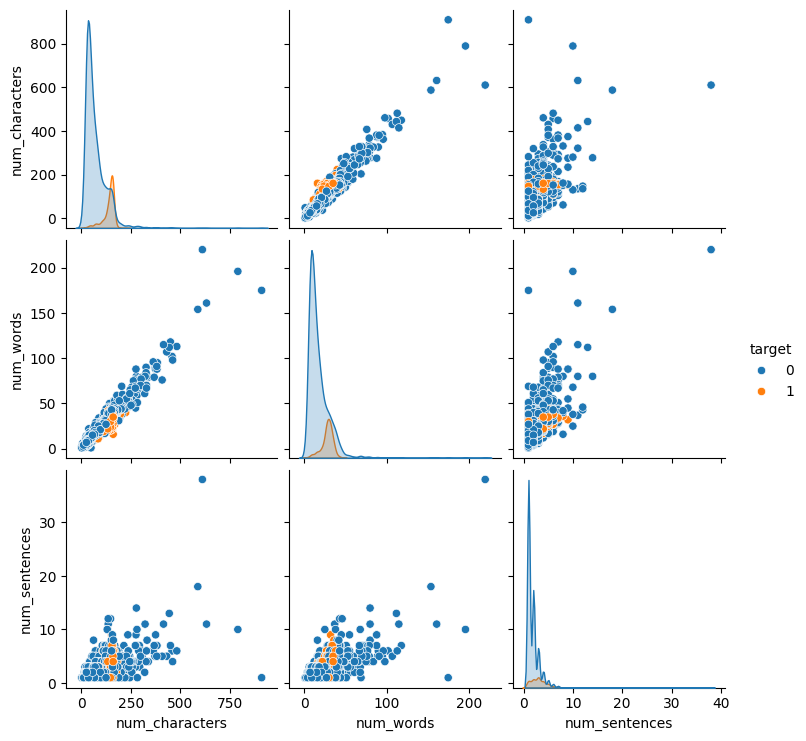

In [29]:
sns.pairplot(df, hue="target")

<Axes: >

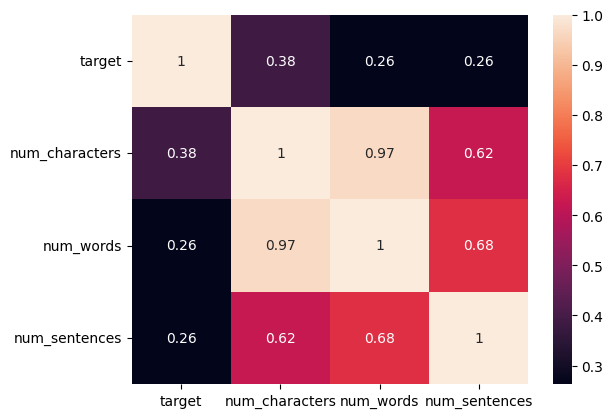

In [30]:
sns.heatmap(df.drop("text", axis=1).corr(), annot=True)

##### 3. Data Preprocessing
 - Lower case
 - Tokenization
 - Removing special characters
 - Removing stop words and punctuation
 - Stemming

In [31]:
try:
    nltk.data.find("corpora/stopwords")
except LookupError:
    nltk.download("stopwords")

In [32]:
from nltk.corpus import stopwords

In [33]:
import string

In [34]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [35]:
def transform_text(text: str) -> str:
    # Convert to Lower case
    text = nltk.word_tokenize(text.lower())

    # Only Contains Alphaneumeric
    y: list[str] = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()

    # Remove Stopwords and Punctuation
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()

    # PorterStemmer
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
df["transformed_text"] = df["text"].apply(transform_text)

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white")

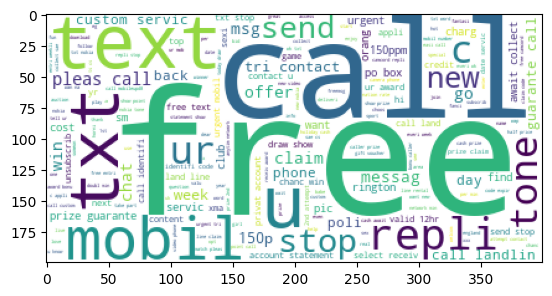

In [39]:
spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

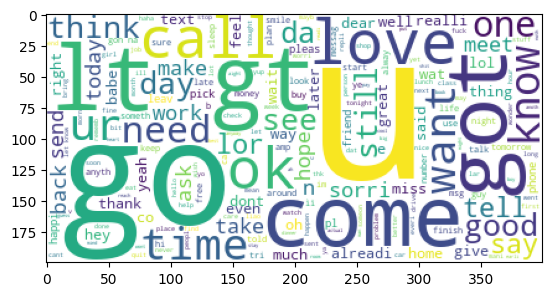

In [40]:
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [41]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [42]:
len(spam_corpus)

9939

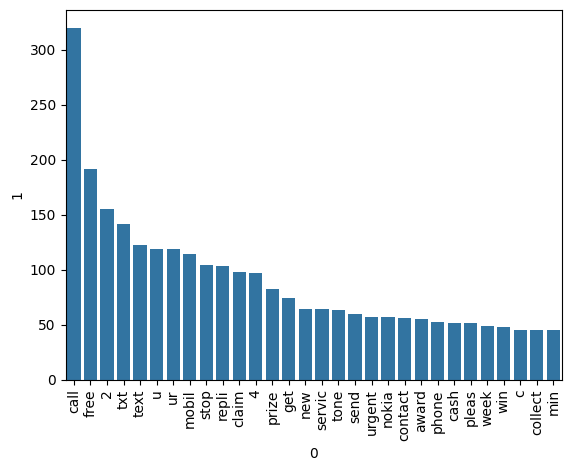

In [43]:
from collections import Counter

sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(60))[1],
)
plt.xticks(rotation="vertical")
plt.show()

In [44]:
ham_corpus = []
for msg in df[df["target"] == 0]["transformed_text"].to_list():
    for word in msg.split():
        ham_corpus.append(word)

In [45]:
len(ham_corpus)

35404

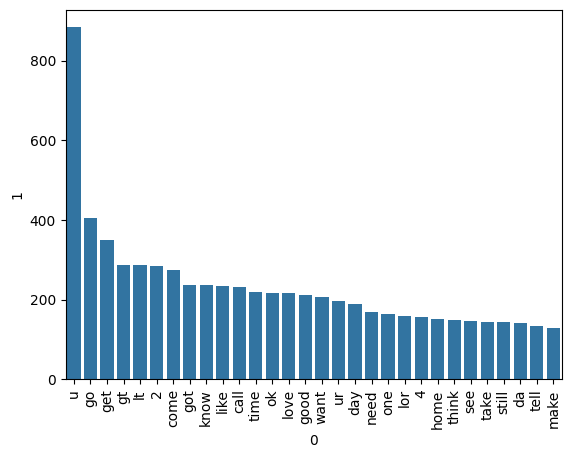

In [46]:
from collections import Counter

sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(60))[1],
)
plt.xticks(rotation="vertical")
plt.show()

##### 4. Model Building

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
X = tfidf.fit_transform(df["transformed_text"]).toarray()

In [49]:
X.shape

(5169, 3000)

In [50]:
y = df["target"].values

In [51]:
y.shape

(5169,)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [57]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [58]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf --> MNB

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
svc = SVC(kernel="sigmoid", gamma=1.0, probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver="liblinear", penalty="l1")
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [61]:
clfs = {
    "SVC": svc,
    "KN": knc,
    "NB": mnb,
    "DT": dtc,
    "LR": lrc,
    "RF": rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "xgb": xgb,
}

In [62]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [63]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [64]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(
        clf, X_train, y_train, X_test, y_test
    )

    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.9709864603481625
Precision - 1.0
For DT
Accuracy - 0.9303675048355899
Precision - 0.83
For LR
Accuracy - 0.9555125725338491
Precision - 0.96
For RF
Accuracy - 0.9738878143133463
Precision - 0.9826086956521739
For AdaBoost
Accuracy - 0.9216634429400387
Precision - 0.8202247191011236
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For GBDT
Accuracy - 0.9506769825918762
Precision - 0.9306930693069307
For xgb
Accuracy - 0.965183752417795
Precision - 0.9396551724137931


In [65]:
performance_df = pd.DataFrame(
    {
        "Algorithm": clfs.keys(),
        "Accuracy": accuracy_scores,
        "Precision": precision_scores,
    }
).sort_values("Precision", ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.965184,0.939655
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.930368,0.830000


Voting Classifier

In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
voting = VotingClassifier(estimators=list(clfs.items()), voting="soft")

In [68]:
voting.fit(X_train, y_train)
y_pred_voting = voting.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting)}")
print(f"Precision: {precision_score(y_test, y_pred_voting)}")

Accuracy: 0.971953578336557
Precision: 0.990990990990991


Stacking Classifier

In [69]:
from sklearn.ensemble import StackingClassifier

In [70]:
stacking = StackingClassifier(estimators=list(clfs.items()), final_estimator=clfs["RF"])

In [71]:
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_stacking)}")
print(f"Precision: {precision_score(y_test, y_pred_stacking)}")

Accuracy: 0.9825918762088974
Precision: 0.96875


In [72]:
import pickle

In [73]:
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

Using Naive Bayes

In [74]:
message = "Hello, Your FEDEX package with tracking code GB-6412-GH83 is waiting for you to set delivery preferences: https://bit.ly/ablkwe"
transformed_message = transform_text(message)
vectorized_message = tfidf.transform([transformed_message])
target = mnb.predict(vectorized_message)
encoder.inverse_transform(target)

array(['spam'], dtype=object)

Using Random Forest

In [75]:
message = "Hello, Your FEDEX package with tracking code GB-6412-GH83 is waiting for you to set delivery preferences: https://bit.ly/ablkwe"
transformed_message = transform_text(message)
vectorized_message = tfidf.transform([transformed_message])
target = rfc.predict(vectorized_message)
encoder.inverse_transform(target)

array(['spam'], dtype=object)

In [76]:
message = "Hi, Hou are You?"
transformed_message = transform_text(message)
vectorized_message = tfidf.transform([transformed_message])
target = mnb.predict(vectorized_message)
encoder.inverse_transform(target)

array(['ham'], dtype=object)

In [77]:
message = "Hi, Hou are You?"
transformed_message = transform_text(message)
vectorized_message = tfidf.transform([transformed_message])
target = rfc.predict(vectorized_message)
encoder.inverse_transform(target)

array(['ham'], dtype=object)